#### Rugplots
Author: Ruth Hanna

This notebook contains the code to generate the guide-level rugplots.

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
sns.set(style='ticks', context='paper',  palette='Set2')
mpl.rc('pdf', fonttype=42)


In [3]:
# Load in data
data = pd.read_csv('../data/interim/all_guide_lfcs_residuals.csv')
data.head()

,Construct Barcode,Construct IDs,condition,lfc,lfc_x,residual,label
0,TGATAGTAGGATAATAGCGA,BRDN0003924380,Vero-E6-New Cas9;D10 5e6;First-infection,-0.456782,-0.860302,0.594065,Cas9-v2 D10 5e6 Hi-MOI
1,TGATAGTAGGATAATAGCGA,BRDN0003924380,Vero-E6-New Cas9;D5 5e6;First-infection,-2.131402,-0.860302,-1.054760,Cas9-v2 D5 5e6 Hi-MOI
2,TGATAGTAGGATAATAGCGA,BRDN0003924380,Vero-E6-New Cas9;D2 5e6;First-infection,-1.881366,-0.860302,-0.786243,Cas9-v2 D2 5e6 Hi-MOI
3,TGATAGTAGGATAATAGCGA,BRDN0003924380,Vero-E6-New Cas9;D5 2.5e6;Low MOI-First,-1.340930,-0.860302,-0.197215,Cas9-v2 D5 2.5e6 Lo-MOI
4,TGATAGTAGGATAATAGCGA,BRDN0003924380,Vero-E6-New Cas9;D5 2.5e6;High MOI-First,0.511683,-0.860302,1.651744,Cas9-v2 D5 2.5e6 Hi-MOI


In [4]:
# Load in chip file (mapping guide to gene)
chip = pd.read_table('../data/interim/CP0070_Chlorocebus_sabeus_remapped.chip')
chip.head()


,Barcode Sequence,Gene Symbol,Gene ID,NCBI Symbol,Pseudo Gene,Gene
0,AAAAAAAAAAACTCAAAGAT,SET,103239793,SET,NaN,SET
1,AAAAAAAAACTGGAATCATG,LOC103248058,103248058,LOC103248058,NaN,LOC103248058
2,AAAAAAACAAAGTGTGGCGT,LOC103243876,103243876,LOC103243876,NaN,LOC103243876
3,AAAAAAACCTCTCGCTCCTG,LOC103243369,103243369,LOC103243369,NaN,LOC103243369
4,AAAAAAAGAGACACTGTTGT,ICOS,103217691,ICOS,NaN,ICOS


In [5]:
# Gets guides from chip file for a given gene symbol
def get_guides_for_gene(gene_symbol):
    return chip.loc[chip['Gene'] == gene_symbol, 'Barcode Sequence'].tolist()


In [6]:
conditions = list(set(data.label.tolist()))

# Only include Cas9-v2 conditions
conditions = [condition for condition in conditions if condition.startswith('Cas9-v2')]
conditions

['Cas9-v2 D5 2.5e6 Hi-MOI',
 'Cas9-v2 D2 5e6 Hi-MOI',
 'Cas9-v2 D5 2.5e6 Lo-MOI',
 'Cas9-v2 D10 5e6 Hi-MOI',
 'Cas9-v2 D5 5e6 Hi-MOI']

In [7]:
# Filter data to only include Cas9-v2 conditions
data = data.loc[data['label'].isin(conditions), ['Construct Barcode', 'label', 'residual']]

# Calculate mean residual across all Cas9-v2 conditions
mean_z = data.groupby(['Construct Barcode']).mean()

mean_z.head()

,residual
Construct Barcode,
AAAAAAAAACTGGAATCATG,0.706080
AAAAAAACAAAGTGTGGCGT,-0.748897
AAAAAAACCTCTCGCTCCTG,0.254776
AAAAAAAGAGACACTGTTGT,1.169518
AAAAAAAGGACCTGAAAGTG,0.830862


In [8]:
def make_rugplots_v2(df, genes, lims=[-5,5]):

    # Make subplots
    height_ratios = [2] + ([1]*len(genes))
    fig,ax = plt.subplots((len(genes)+1), 1, figsize=(2,len(genes)/4+0.5), gridspec_kw={'height_ratios': height_ratios}, sharex=True)

    # KDE plot of all residuals
    sns.kdeplot(data=df['residual'], color='black', legend=False, ax=ax[0])
    ax[0].set_xlim(lims)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[0].text(5.5, 0.2, 'full library', fontsize=8)

    # Rugplots for each gene
    for i, gene in enumerate(genes):
        guides = get_guides_for_gene(gene)
        sns.rugplot(a=df.loc[df.index.isin(guides),'residual'],height=1, ax=ax[i+1], color='black', alpha=0.5)
        print(len(df.loc[df.index.isin(guides),'residual']))
        ax[i+1].text(5.5, 0.4, gene, fontsize=8)
        ax[i+1].set_xticks([])
        ax[i+1].set_yticks([])

    ax[len(genes)].set_xticks([-4, -2, 0, 2, 4])
    ax[len(genes)].tick_params(labelsize=8)
    ax[len(genes)].set_xlabel('mean residual', fontsize=8)
    
    return fig, ax



In [9]:
mean_data = pd.read_csv('../data/processed/Cas9_v2_avg_zscores.csv')
mean_data.head()

,Gene,mean_z,n,mean_lfc,combined_pvalue,fdr,ascending_rank,descending_rank
0,A1BG,-0.658483,4,-0.260650,0.580939,1.000000,4211.0,17462.0
1,A1CF,0.291824,4,0.035876,0.948948,1.000000,13599.0,8074.0
2,A2ML1,0.758146,4,-0.391920,0.429209,1.000000,18103.0,3570.0
3,A3GALT2,0.460144,4,0.426764,0.353254,1.000000,15459.0,6214.0
4,A4GALT,0.976356,4,0.646544,0.218853,0.866779,19500.0,2173.0


In [10]:
genes_df = pd.read_csv('../data/external/validated_genes.csv')
genes_df = pd.merge(genes_df, mean_data, on='Gene', how='left')
genes_df = genes_df.sort_values(by='descending_rank')

In [11]:
def make_rugplots_v3(df, genes, color_list, lims=[-5,5]):

    sns.set_style('white')
    
    # Make subplots
    height_ratios = [2] + ([1]*len(genes))
    fig,ax = plt.subplots((len(genes)+1), 1, figsize=(2,len(genes)/4+0.5), gridspec_kw={'height_ratios': height_ratios}, sharex=True)

    # KDE plot of all residuals
    sns.kdeplot(data=df['residual'], color='black', legend=False, ax=ax[0])
    ax[0].set_xlim(lims)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[0].text(5.5, 0.2, 'full library', fontsize=8)
    ax[0].axvline(x=0,ymin=-1.2,ymax=1,c='black',linestyle='dashed',linewidth=0.5,zorder=0, clip_on=False)
    
    # Rugplots for each gene
    for i, gene in enumerate(genes):
        guides = get_guides_for_gene(gene)
        sns.rugplot(a=df.loc[df.index.isin(guides),'residual'],height=1, ax=ax[i+1], color=color_list[i], alpha=0.5)
        ax[i+1].text(5.5, 0.4, gene, fontsize=8)
        ax[i+1].set_xticks([])
        ax[i+1].set_yticks([])
        ax[i+1].axvline(x=0,ymin=-1.2,ymax=1,c='black',linestyle='dashed',linewidth=0.5,zorder=0, clip_on=False)
        
    
    ax[len(genes)].set_xticks([-4, -2, 0, 2, 4])
    ax[len(genes)].tick_params(labelsize=8)
    ax[len(genes)].set_xlabel('mean residual', fontsize=8)
    
    
    return fig, ax



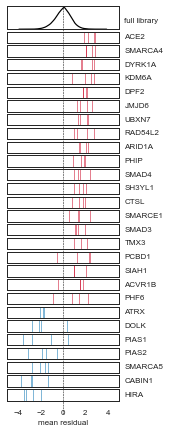

In [12]:
def get_color(row):
    if row['ascending_rank'] < 300:
        return '#0571b0'
    elif row['descending_rank'] < 300:
        return '#ca0020'
    else:
        return 'black'
    
genes_df['color'] = genes_df.apply(get_color, axis=1)
color_list = genes_df['color'].tolist()
genes = genes_df['Gene'].tolist()

fig, ax = make_rugplots_v3(mean_z, genes, color_list)
fig.savefig('../figures/raw-plots/rugplot_validation_v1.pdf',bbox_inches='tight', transparent=True)

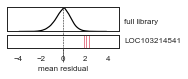

In [13]:
# LOC103214541 corresponds to high mobility group protein B1-like
genes = ['LOC103214541']
color_list = ['#ca0020']

fig, ax = make_rugplots_v3(mean_z, genes, color_list)
fig.savefig('../figures/raw-plots/rugplot_HMGB1_v2.pdf',bbox_inches='tight', transparent=True)


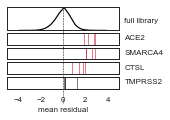

In [14]:
genes = ['ACE2', 'SMARCA4', 'CTSL', 'TMPRSS2']
color_list = ['#ca0020', '#ca0020', '#ca0020', 'black']

fig, ax = make_rugplots_v3(mean_z, genes, color_list)
fig.savefig('../figures/raw-plots/rugplot_v2.pdf',bbox_inches='tight', transparent=True)

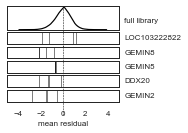

In [29]:
# LOC103222822 corresponds to SMN1
genes = ['LOC103222822', 'GEMIN8', 'GEMIN5', 'DDX20', 'GEMIN2']
color_list = ['black']*len(genes)

fig, ax = make_rugplots_v3(mean_z, genes, color_list)
fig.savefig('../figures/raw-plots/SMN_rugplot.pdf', bbox_inches='tight', transparent=True)

In [28]:
with open('../data/interim/SMN_guides.csv', mode='w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for gene in genes:
        guides = get_guides_for_gene(gene)
        for guide in guides:
            writer.writerow([gene, guide])
